In [5]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [11]:
# Set paths to data files
DATA_DIR = "data/"
RESULTS_FILE = DATA_DIR + "results_by_license_auction108.csv"
MARKETS_FILE = DATA_DIR + "market_auction108.csv"

In [12]:
# Load the CSV files
print("Loading data files...")

# Load the CSV files
results_df = pd.read_csv(RESULTS_FILE, low_memory=False)
markets_df = pd.read_csv(MARKETS_FILE, low_memory=False)

print(f"Loaded {len(results_df)} rows from results_by_license_auction108.csv")
print(f"Loaded {len(markets_df)} rows from market_auction108.csv")

Loading data files...
Loaded 7872 rows from results_by_license_auction108.csv
Loaded 2804 rows from market_auction108.csv


In [13]:
# Display the first few rows of each dataframe
print("\nSample of results_by_license_auction108.csv:")
results_df.head()


Sample of results_by_license_auction108.csv:


,auction_id,license,market,market_name,category,bidder,frn,bidding_credit_type,bidding_credit,gross_license_price,net_license_price,effective_bidding_credit
0,108,D01001-1,AL-001,Autauga,C1,T-Mobile License LLC,1565449,NaN,0,17000,17000,0.0
1,108,D01001-2,AL-001,Autauga,C2,T-Mobile License LLC,1565449,NaN,0,17000,17000,0.0
2,108,D01001-3,AL-001,Autauga,C3,T-Mobile License LLC,1565449,NaN,0,63000,63000,0.0
3,108,D01003-1,AL-003,Baldwin,C1,T-Mobile License LLC,1565449,NaN,0,273000,273000,0.0
4,108,D01003-2,AL-003,Baldwin,C2,T-Mobile License LLC,1565449,NaN,0,444000,444000,0.0


In [14]:
# Display market dataframe
print("\nSample of market_auction108.csv:")
markets_df.head()


Sample of market_auction108.csv:


,auction_id,market,market_name,census_id,population,small_market_indicator
0,108,AK-013,Aleutians East,2013,3141,Y
1,108,AK-016,Aleutians West,2016,5561,Y
2,108,AK-020,Anchorage,2020,291826,Y
3,108,AK-050,Bethel,2050,17013,Y
4,108,AK-068,Denali,2068,1826,Y


In [15]:
# Check for missing values
print("\nMissing values in results_by_license_auction108.csv:")
results_df.isnull().sum()


Missing values in results_by_license_auction108.csv:


auction_id                     0
license                        0
market                         0
market_name                    0
category                       0
bidder                         0
frn                            0
bidding_credit_type         7400
bidding_credit                 0
gross_license_price            0
net_license_price              0
effective_bidding_credit       0
dtype: int64

In [16]:
# Check missing values in markets dataframe
print("\nMissing values in market_auction108.csv:")
markets_df.isnull().sum()


Missing values in market_auction108.csv:


auction_id                0
market                    0
market_name               0
census_id                 0
population                0
small_market_indicator    0
dtype: int64

In [17]:
# Merge the dataframes on market column
# Based on the file documentation, market in results_df and market in markets_df can be joined
combined_df = pd.merge(results_df, markets_df, on=["auction_id", "market"], how="inner")

print(f"\nCombined dataframe has {len(combined_df)} rows")
combined_df.head()


Combined dataframe has 7872 rows


,auction_id,license,market,market_name_x,category,bidder,frn,bidding_credit_type,bidding_credit,gross_license_price,net_license_price,effective_bidding_credit,market_name_y,census_id,population,small_market_indicator
0,108,D01001-1,AL-001,Autauga,C1,T-Mobile License LLC,1565449,NaN,0,17000,17000,0.0,Autauga,1001,54571,Y
1,108,D01001-2,AL-001,Autauga,C2,T-Mobile License LLC,1565449,NaN,0,17000,17000,0.0,Autauga,1001,54571,Y
2,108,D01001-3,AL-001,Autauga,C3,T-Mobile License LLC,1565449,NaN,0,63000,63000,0.0,Autauga,1001,54571,Y
3,108,D01003-1,AL-003,Baldwin,C1,T-Mobile License LLC,1565449,NaN,0,273000,273000,0.0,Baldwin,1003,182265,N
4,108,D01003-2,AL-003,Baldwin,C2,T-Mobile License LLC,1565449,NaN,0,444000,444000,0.0,Baldwin,1003,182265,N


In [18]:
# Basic data analysis
print("\n---- Data Analysis ----")

# Summary statistics
print("\nSummary statistics for numeric columns:")
combined_df.describe()


---- Data Analysis ----

Summary statistics for numeric columns:


,auction_id,frn,bidding_credit,gross_license_price,net_license_price,effective_bidding_credit,census_id,population
count,7872.0,7.872000e+03,7872.000000,7.872000e+03,7.872000e+03,7872.000000,7872.000000,7.872000e+03
mean,108.0,2.439919e+06,1.166159,5.434320e+04,5.324355e+04,1.166197,31052.859756,7.262039e+04
std,0.0,4.077454e+06,4.775412,2.608580e+05,2.596702e+05,4.775584,15517.180429,2.583993e+05
min,108.0,1.542372e+06,0.000000,5.000000e+02,3.750000e+02,0.000000,1001.000000,0.000000e+00
25%,108.0,1.565449e+06,0.000000,3.000000e+03,3.000000e+03,0.000000,19092.500000,1.019800e+04
50%,108.0,1.565449e+06,0.000000,1.000000e+04,1.000000e+04,0.000000,30032.000000,2.336550e+04
75%,108.0,1.565449e+06,0.000000,4.400000e+04,4.100000e+04,0.000000,46127.500000,5.458700e+04
max,108.0,3.237933e+07,25.000000,1.602900e+07,1.602900e+07,25.070000,72147.000000,9.818605e+06


In [24]:
# Distribution of license categories
print("\nDistribution of license categories:")
category_counts = combined_df['category'].value_counts()
category_counts


Distribution of license categories:


category
C2    2754
C1    2645
C3    2473
Name: count, dtype: int64

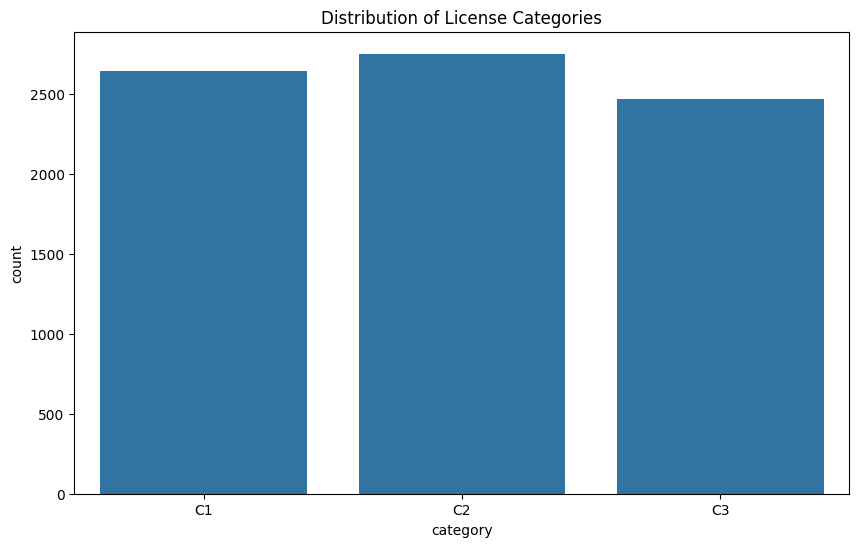

In [20]:
# Plot category distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=combined_df)
plt.title('Distribution of License Categories')
plt.savefig('category_distribution.png')
plt.show()


Distribution of bidding credits:
bidding_credit
0     7400
15     262
25     210
Name: count, dtype: int64


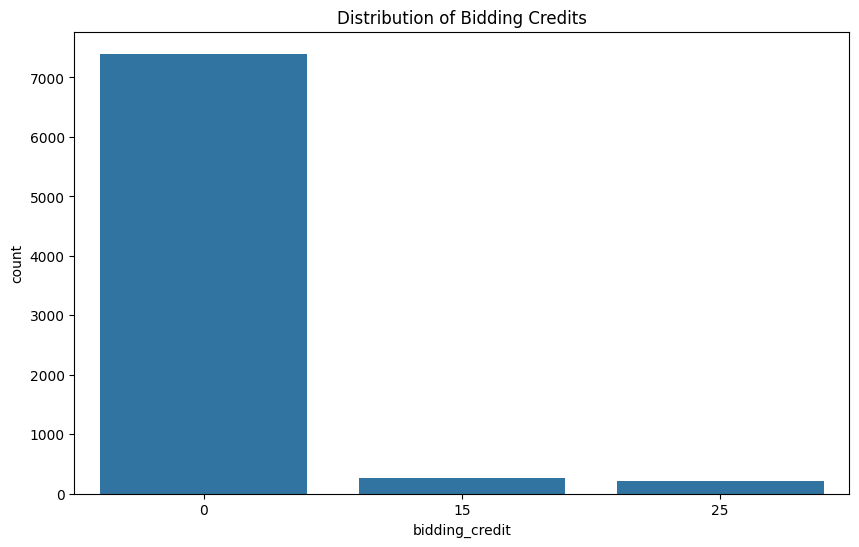

In [21]:
# Distribution of bidding credits
if 'bidding_credit' in combined_df.columns:
    print("\nDistribution of bidding credits:")
    credit_counts = combined_df['bidding_credit'].value_counts()
    print(credit_counts)
    
    plt.figure(figsize=(10, 6))
    sns.countplot(x='bidding_credit', data=combined_df)
    plt.title('Distribution of Bidding Credits')
    plt.savefig('bidding_credit_distribution.png')
    plt.show()


Correlation between population and gross license price:
Correlation: 0.2203


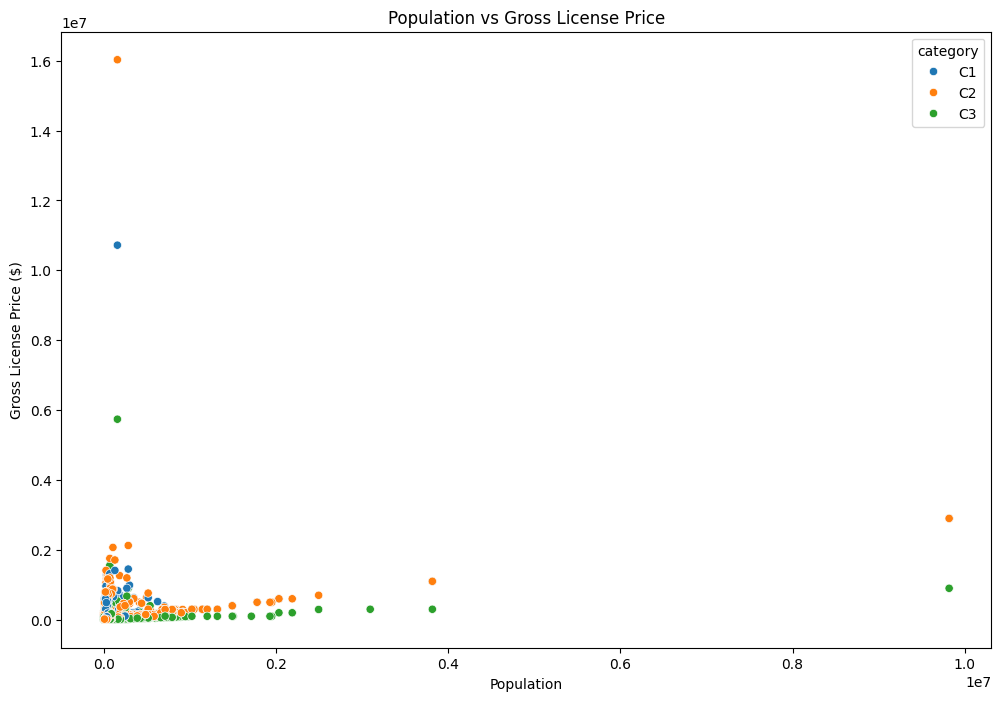

In [22]:
# Analyze relationship between population and license price
print("\nCorrelation between population and gross license price:")
correlation = combined_df['population'].corr(combined_df['gross_license_price'])
print(f"Correlation: {correlation:.4f}")

plt.figure(figsize=(12, 8))
sns.scatterplot(x='population', y='gross_license_price', hue='category', data=combined_df)
plt.title('Population vs Gross License Price')
plt.xlabel('Population')
plt.ylabel('Gross License Price ($)')
plt.savefig('population_vs_price.png')
plt.show()

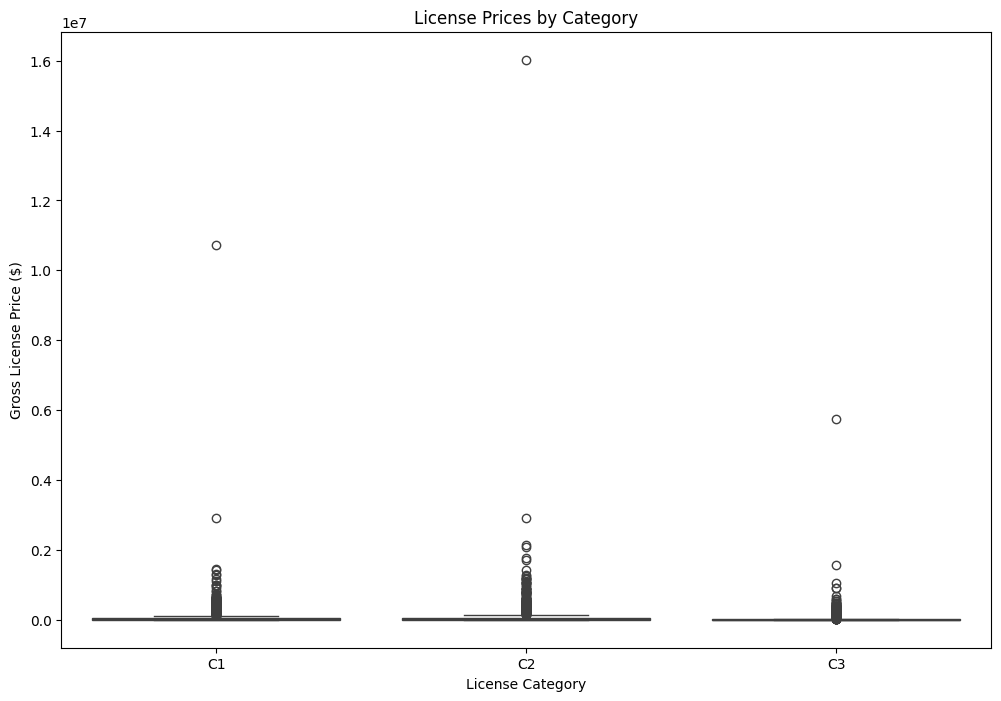

In [23]:
# Analyze price differences across categories
plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='gross_license_price', data=combined_df)
plt.title('License Prices by Category')
plt.xlabel('License Category')
plt.ylabel('Gross License Price ($)')
plt.savefig('price_by_category.png')
plt.show()

In [ ]:
# Analyze if small market indicator affects pricing
if 'small_market_indicator' in combined_df.columns:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='small_market_indicator', y='gross_license_price', data=combined_df)
    plt.title('License Prices by Small Market Indicator')
    plt.xlabel('Small Market')
    plt.ylabel('Gross License Price ($)')
    plt.savefig('price_by_market_size.png')
    plt.show()

In [25]:
# Prepare data for machine learning
print("\n---- Preparing for Machine Learning Model ----")

# Define features and target
X = combined_df.drop(['gross_license_price', 'net_license_price', 'license', 'market_name', 'market_name_y', 
                 'bidder', 'frn', 'auction_id'], axis=1, errors='ignore')
y = combined_df['gross_license_price']

# Handle categorical variables
categorical_features = ['category', 'market', 'bidding_credit_type', 'small_market_indicator']
categorical_features = [col for col in categorical_features if col in X.columns]

numerical_features = [col for col in X.columns if col not in categorical_features]

print("Categorical features:", categorical_features)
print("Numerical features:", numerical_features)


---- Preparing for Machine Learning Model ----
Categorical features: ['category', 'market', 'bidding_credit_type', 'small_market_indicator']
Numerical features: ['market_name_x', 'bidding_credit', 'effective_bidding_credit', 'census_id', 'population']


In [26]:
# Create preprocessor for the ML pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

# Create and train the model using a pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

model.fit(X_train, y_train)

Training set size: 6297
Testing set size: 1575


ValueError: could not convert string to float: 'Valdez-Cordova'

In [ ]:
# Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

In [ ]:


# Cell 20: Plot actual vs. predicted values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual License Price')
plt.ylabel('Predicted License Price')
plt.title('Actual vs Predicted License Prices')
plt.savefig('actual_vs_predicted.png')
plt.show()

# Cell 21: Feature importance
try:
    feature_names = numerical_features.copy()
    for i, col in enumerate(categorical_features):
        one_hot_values = model.named_steps['preprocessor'].transformers_[1][1].categories_[i]
        feature_names.extend([f"{col}_{val}" for val in one_hot_values])
    
    # Get feature importances from the model
    importances = model.named_steps['regressor'].feature_importances_
    
    # Only display the top 15 features if there are more than that
    if len(importances) > 15:
        indices = np.argsort(importances)[-15:]
        plt.figure(figsize=(12, 8))
        plt.title('Top 15 Feature Importances')
        plt.barh(range(len(indices)), importances[indices], color='b', align='center')
        plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
        plt.xlabel('Relative Importance')
    else:
        indices = np.argsort(importances)
        plt.figure(figsize=(12, 8))
        plt.title('Feature Importances')
        plt.barh(range(len(indices)), importances[indices], color='b', align='center')
        plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
        plt.xlabel('Relative Importance')
    
    plt.savefig('feature_importance.png')
    plt.show()
except Exception as e:
    print(f"Error plotting feature importances: {e}")
    print("This is likely due to a mismatch in feature names after preprocessing.")

# Cell 22: Save the model (optional)
import pickle

# Save the model to disk
with open('fcc_auction_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model saved as 'fcc_auction_model.pkl'")